### Esercizio 2.1
Calcolo $I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$ con due campionamenti:
- distribuzione uniforme
- importance sampling con $d(x) = 2(1-x) $

In [15]:
from scipy.stats import norm
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def block_ave(data, blocks): #returns array of length "blocks"
    if blocks <=0:
        print("block_ave cannot run, please assign a positive number of blocks")
        return 0
    ave = np.zeros(blocks)
    block_size = int(data.size/blocks)
    for i in range(blocks):
        block_sum = 0
        for j in range(block_size):
            k = j+i*block_size
            block_sum += data[k]
            ave[i] = block_sum/block_size  
    return ave

def error(ave,ave2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((ave2 - ave**2)/n)
    
def prog_ave(vec):
    prog_ave = np.zeros(vec.size)
    prog_ave2 = np.zeros(vec.size)
    vec2 = np.zeros(vec.size)
    err_prog = np.zeros(vec.size)
    for i in range(vec.size):
        vec2[i]= vec[i]**2
        for j in range(i+1):
            prog_ave[i] += vec[j]
            prog_ave2[i] += vec2[j]
        prog_ave[i] = prog_ave[i]/(i+1)
        prog_ave2[i] = prog_ave2[i]/(i+1)
        err_prog[i] = error(prog_ave[i], prog_ave2[i], i)
    return prog_ave, err_prog

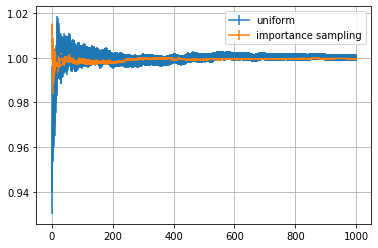

In [13]:
folder = 'exercise02-1/'
integral = np.loadtxt(folder + "integral.dat")
blocks = int(integral[:,0].size)

cum_ave_unif, err_unif = prog_ave(integral[:,0])
cum_ave_strai, err_strai = prog_ave(integral[:,1])
block_prog = np.arange(blocks)

plt.errorbar(block_prog, cum_ave_unif, yerr = err_unif, label='uniform')
plt.errorbar(block_prog, cum_ave_strai, yerr = err_strai, label='importance sampling')
plt.grid(True)
plt.legend()
plt.show()

### Esercizio 2.2

Simulo un random walk in 3D in due modi
- Passo su reticolo cubico in direzione equiprobabile (discreto)
- Passo su sfera unitaria campionata uniformemente (continuo)

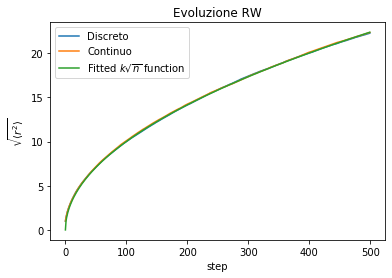

Fit: k = 1.0020592757328557 +- 0.00020599360937742611


In [24]:
folder = 'exercise02-2/'
n_blocks = 100

distance2 = np.loadtxt(folder + 'random_walk.dat')
av_dist = np.sqrt(distance2)
distance2_cont = np.loadtxt(folder + 'random_walk_cont.dat')
av_dist_cont = np.sqrt(distance2_cont)

# Fit a function k * sqrt(n) to the data
def f(x, k):
    return k * np.sqrt(x)


plt.plot(av_dist, label='Discreto')
plt.plot(av_dist_cont, label='Continuo')
x_range = range(len(av_dist))
optimal_values, covariance_matrix = curve_fit(f, x_range, av_dist)
k_fit = optimal_values[0]
plt.plot(
    x_range,
    [k_fit * np.sqrt(x) for x in x_range],
    label = r"Fitted $k\sqrt{n}$ function" )
plt.legend()
plt.title('Evoluzione RW')
plt.xlabel('step')
plt.ylabel(r'$ \sqrt{\langle r^2 \rangle} $')
plt.show()

print("Fit: k = {0} +- {1}".format(optimal_values[0], np.sqrt(covariance_matrix[0][0]))) 

Si osserva il comportamento diffusivo previsto. Non ci sono differenze significative tra evoluzione su reticolo o con passo "sferico"